Link drive to the code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


import dependencies

In [3]:
!pip install -U git+https://github.com/qubvel/efficientnet
import efficientnet.keras as efn 
from keras_preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from keras.utils import Sequence
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping

import numpy as np 
import cv2 
import os
import tqdm
import shutil
from keras.models import load_model

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
classes=['Citrus_Healthy', 'Citrus_Nitrogen_Deficiency', 'Citrus_Phosphorous_Deficiency', 'Citrus_Pottassium_Deficiency','Groundnut_Healthy','Groundnut_Nitrogen_Deficiency','Groundnut_Pottassium_Deficiency','Groundnut_Sulfur_Deficiency','Guava_Healthy','Guava_Nitrogen_Deficiency','Guava_Pottassium_Deficiency']

  Cloning https://github.com/qubvel/efficientnet to c:\users\abans\appdata\local\temp\pip-req-build-6ogai6kg
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18515 sha256=b00ea4bb5e14e9f40868a100ceaf97a77f1570b0bedcea24b6765444198ba258
  Stored in directory: C:\Users\Abans\AppData\Local\Temp\pip-ephem-wheel-cache-_1p78km2\wheels\11\69\85\814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


  Running command git clone -q https://github.com/qubvel/efficientnet 'C:\Users\Abans\AppData\Local\Temp\pip-req-build-6ogai6kg'
Using TensorFlow backend.


Augument the existing data to generate more data. 

In [5]:
augmentor_datagen = ImageDataGenerator( 
    rotation_range=45,      # random rotaition of image is between 0-45 degree 
    width_shift_range=0.1,  #shifts image horizontal
    height_shift_range=0.1, #shifts image vertical
    zoom_range=0.15,        #zoom image
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")# save aumented images

num_Aug=[8,9,7,5,7,7,8,8,7,9,5]

def Augment(path,class_Ind):
    for img_name in tqdm.tqdm(os.listdir(path)): 
        img = np.expand_dims(cv2.imread(os.path.join(path,img_name)),axis=0)
        i=num_Aug[class_Ind]
        for batch in augmentor_datagen.flow(
            img,
            batch_size=1,
            save_to_dir=os.path.join(save_dir+classes[class_Ind]),
            save_prefix=classes[class_Ind],
            save_format='jpg'):
            i-=1
            if i==0:
                break

img_dir = 'E:/Datasets/trainingData'
save_dir='E:/Datasets/augmented/' 

for folder in classes:
    path = os.path.join(img_dir,folder)
    class_Ind= classes.index(folder)
    Augment(path,class_Ind)

img_dir = 'E:/Datasets/testingData/' 
img_dir = 'E:/Datasets/trainingData/'
save_dir= 'E:/Datasets/augmented/' 

for folder in classes:
    path = os.path.join(img_dir,folder)
    class_Ind= classes.index(folder)
    Augment(path,class_Ind)
for folder in classes:
    path = os.path.join(img_dir,folder)
    class_Ind= classes.index(folder)
    Augment(path,class_Ind)



  0%|                                                                                           | 0/52 [00:00<?, ?it/s]

  2%|█▌                                                                                 | 1/52 [00:00<00:24,  2.07it/s]

  4%|███▏                                                                               | 2/52 [00:00<00:24,  2.06it/s]

  6%|████▊                                                                              | 3/52 [00:01<00:21,  2.24it/s]

  8%|██████▍                                                                            | 4/52 [00:01<00:19,  2.49it/s]

 10%|███████▉                                                                           | 5/52 [00:01<00:15,  3.06it/s]

 12%|█████████▌                                                                         | 6/52 [00:02<00:13,  3.33it/s]

 13%|███████████▏                                                                       | 7/52 [00:02<00:11,  3.77it/s]

 15%|████████████▊            

 65%|█████████████████████████████████████████████████████                            | 91/139 [00:14<00:07,  6.72it/s]

 66%|█████████████████████████████████████████████████████▌                           | 92/139 [00:14<00:06,  7.14it/s]

 67%|██████████████████████████████████████████████████████▏                          | 93/139 [00:14<00:06,  6.62it/s]

 68%|███████████████████████████████████████████████████████▎                         | 95/139 [00:14<00:05,  7.49it/s]

 69%|███████████████████████████████████████████████████████▉                         | 96/139 [00:14<00:05,  7.73it/s]

 70%|████████████████████████████████████████████████████████▌                        | 97/139 [00:14<00:05,  7.10it/s]

 71%|█████████████████████████████████████████████████████████▋                       | 99/139 [00:15<00:04,  8.07it/s]

 72%|█████████████████████████████████████████████████████████▌                      | 100/139 [00:15<00:05,  7.23it/s]

 73%|███████████████████████████

 33%|██████████████████████████▏                                                    | 44/133 [18:01<2:24:17, 97.28s/it]

 34%|██████████████████████████▋                                                    | 45/133 [19:07<2:09:07, 88.03s/it]

 35%|███████████████████████████▎                                                   | 46/133 [20:28<2:04:19, 85.74s/it]

 35%|███████████████████████████▉                                                   | 47/133 [22:21<2:13:53, 93.41s/it]

 36%|████████████████████████████▌                                                  | 48/133 [23:39<2:06:48, 89.52s/it]

 37%|█████████████████████████████                                                  | 49/133 [25:20<2:08:09, 91.54s/it]

 38%|█████████████████████████████▎                                                | 50/133 [27:40<2:27:17, 106.47s/it]

 38%|█████████████████████████████▉                                                | 51/133 [29:48<2:32:26, 111.54s/it]

 39%|███████████████████████████

MemoryError: Unable to allocate 275. MiB for an array with shape (3, 6000, 4000) and data type float32

load all the generate images into a default dataloader to train the models. 

In [5]:

augmentor_datagen = ImageDataGenerator( 
    rotation_range=45,      # random rotaition of image is between 0-45 degree 
    width_shift_range=0.1,  #shifts image horizontal
    height_shift_range=0.1, #shifts image vertical
    zoom_range=0.15,        #zoom image
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")# save aumented images

img_size=224
TRAINING_DIR = 'E:/Research/Datasets/augmented/' 


training_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
train_generator = training_datagen.flow_from_directory( 
    directory=TRAINING_DIR, 
    target_size=(img_size,img_size),
    shuffle=True, 
    batch_size=16,
    subset='training',
)
validation_generator = training_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(img_size,img_size),
    shuffle=True, 
    batch_size=16,
    subset='validation',
)

path="E:/Research/Datasets/testaugmented/" 

img_size=224
image_gen = ImageDataGenerator(rescale = 1./255)
image_pred = image_gen.flow_from_directory( path,
                                            target_size=(img_size,img_size),
                                            batch_size=5,
                                            shuffle=False,
                                            class_mode='categorical')
image_pred.reset()

Found 8754 images belonging to 11 classes.
Found 2184 images belonging to 11 classes.
Found 1032 images belonging to 11 classes.


In [17]:
#Actual Classes
classes=['Citrus_Healthy', 'Citrus_Nitrogen_Deficiency', 'Citrus_Phosphorous_Deficiency', 'Citrus_Pottassium_Deficiency', 'Groundnut_Healthy', 'Groundnut_Nitrogen_Deficiency', 'Groundnut_Pottassium_Deficiency', 'Groundnut_Sulfur_Deficiency', 'Guava_Healthy', 'Guava_Nitrogen_Deficiency', 'Guava_Pottassium_Deficiency']


import numpy as np


def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
 
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Efficientnet

In [6]:
model1 = efn.EfficientNetB0(include_top=True, weights=None, classes=len(classes)) 
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=5)
history = model1.fit(train_generator, epochs=15)
model1.save("E:/Research/Datasets/model/efficientnet.h5")

Epoch 1/15
548/548 [==============================] - 3117s 6s/step - loss: 1.0302 - accuracy: 0.6857
Epoch 2/15
548/548 [==============================] - 2820s 5s/step - loss: 0.5711 - accuracy: 0.8035
Epoch 3/15
548/548 [==============================] - 2592s 5s/step - loss: 0.4152 - accuracy: 0.8549
Epoch 4/15
548/548 [==============================] - 2562s 5s/step - loss: 0.3421 - accuracy: 0.8829
Epoch 5/15
548/548 [==============================] - 2959s 5s/step - loss: 0.3114 - accuracy: 0.8983
Epoch 6/15
548/548 [==============================] - 2931s 5s/step - loss: 0.2478 - accuracy: 0.9212
Epoch 7/15
548/548 [==============================] - 2745s 5s/step - loss: 0.1651 - accuracy: 0.9433
Epoch 8/15
548/548 [==============================] - 3021s 6s/step - loss: 0.2770 - accuracy: 0.9130
Epoch 9/15
548/548 [==============================] - 2575s 5s/step - loss: 0.1760 - accuracy: 0.9409
Epoch 10/15
548/548 [==============================] - 2451s 4s/step - loss: 0.125

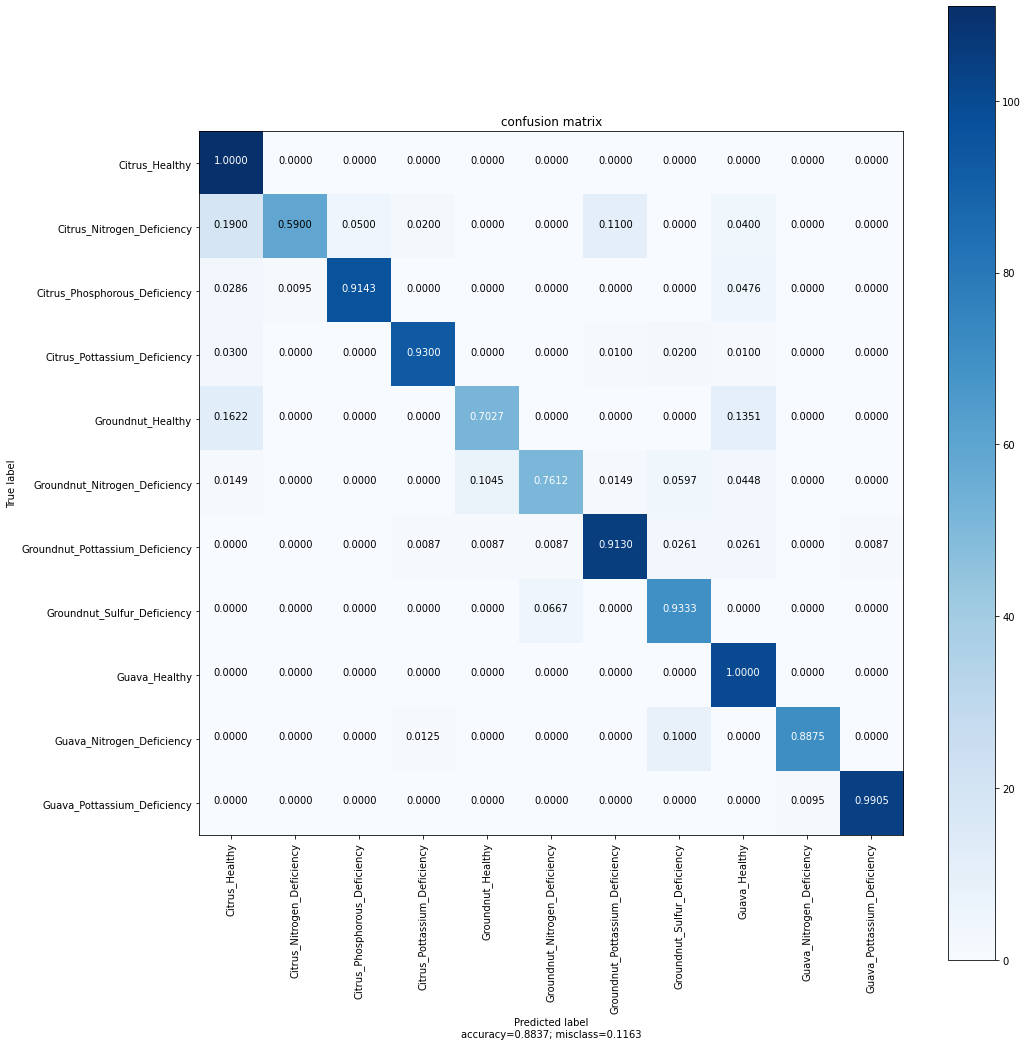

accuracy = 0.8837209302325582


In [18]:
model = load_model("E:/Research/Datasets/model/efficientnet.h5") 

Y_predictions = model.predict_generator(image_pred)
Y_predicted_class_indices= np.argmax(Y_predictions,axis=1)
cm=confusion_matrix(image_pred.classes, Y_predicted_class_indices)
plot_confusion_matrix(cm, classes=classes,title='confusion matrix')
plt.show()

from sklearn.metrics import accuracy_score
print ('accuracy', end = ' = ')
print (accuracy_score(image_pred.classes, Y_predicted_class_indices))

In [19]:
import tensorflow as tf
import efficientnet.tfkeras


model = tf.keras.models.load_model("E:/Research/Datasets/model/efficientnet.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("efficientnet.tflite", "wb").write(tflite_model)

16070068